In [86]:
using Controlz, PyPlot

PyPlot.matplotlib.style.use("ggplot")

# Pollution in a lake

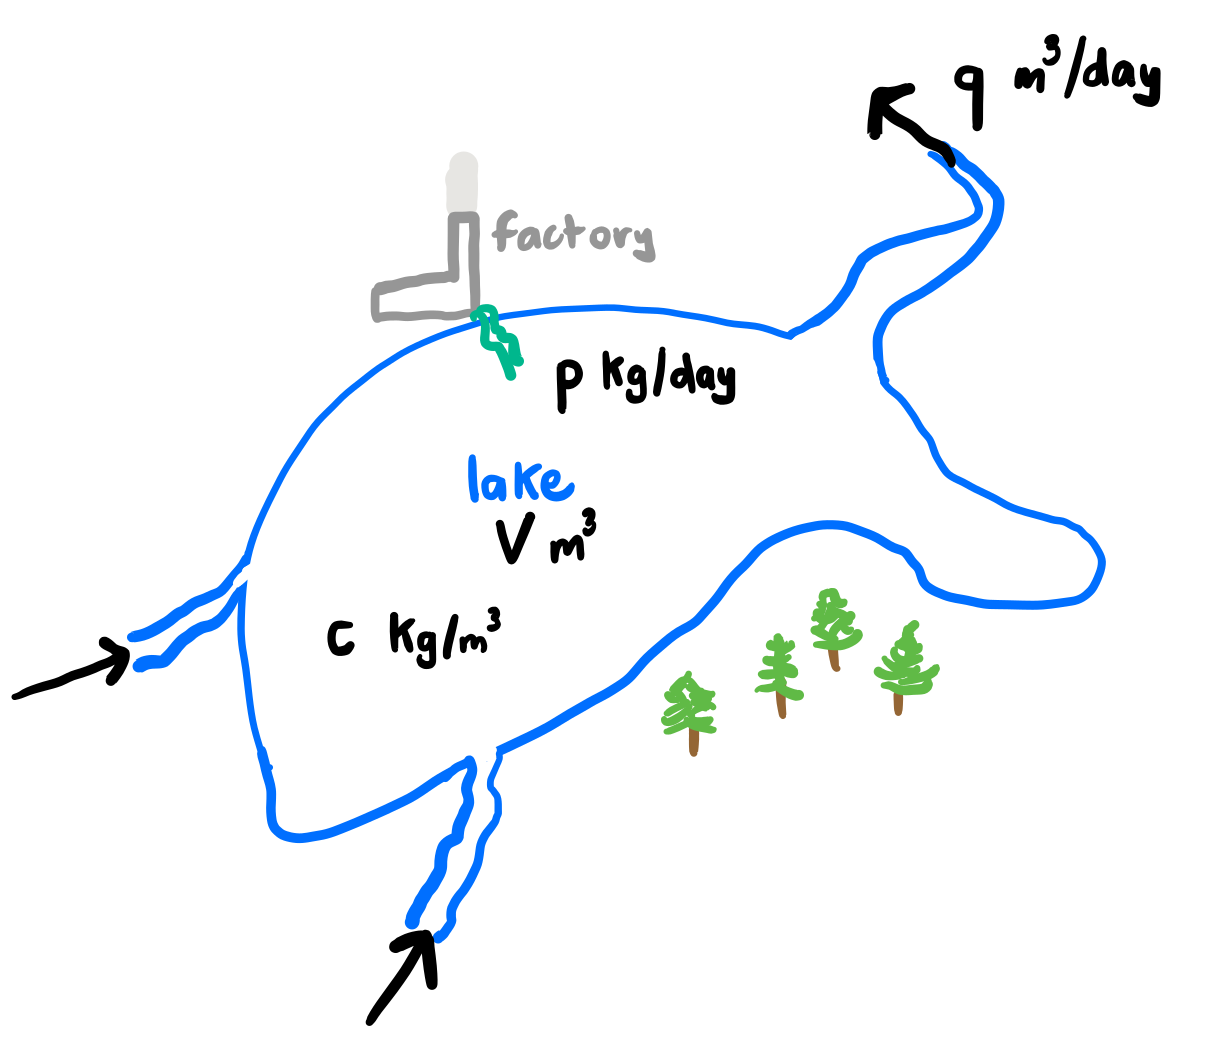

the concentration of a pollutant in a lake $C^*(s)$ is affected by (i) the rate of pollution $P^*(s)$ and (ii) the rate of water outflow $Q^*(s)$ as below, with $G_p(s)$ and $G_q(s)$ the respective transfer functions.

$$C^*(s) = G_p(s) P^*(s) + G_q(s) Q^*(s)$$

$$G_p(s)=\dfrac{0.001}{10s+1}$$

$$G_q(s)=\dfrac{-0.000005}{10 s + 1}$$

define these transfer functions as variables `G_p` and `G_q` below using `Controlz.jl`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#constructing-a-transfer-function).

In [87]:
G_p = (0.001) / (10*s + 1) #transfer function, pollutants


   0.001
------------
10.0*s + 1.0

In [88]:
G_q = (-0.000005) / (10*s + 1) #transfer function, water outflow


  -5.0e-6
------------
10.0*s + 1.0

should $G_p$ and $G_q$ indeed have the same time constant, according to your derivation?

<mark>yes! G_p and G_q should have the same time constant. </mark>

check the gains of the transfer functions `G_p` and `G_q` with `zero_frequency_gain` (see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#Controlz.zero_frequency_gain)).

In [89]:
zero_frequency_gain(G_p)

0.001

In [90]:
zero_frequency_gain(G_q)

-5.0e-6

justify/explain the signs ($+$/$-$) of the gains of these two transfer functions.

<mark>G_p is the pollutants in the lake, G_q is the pollutants from the stream leaving the lake. </mark>

(1) the factory suddenly dumps an extra 20 kg of pollutant into the lake at time zero, with $p$ remaining at its steady state value $\bar{p}$ after that, while $q$ remains at its steady state value $\bar{q}$ the whole time. simulate the response of the concentration of the pollutant in the lake, $c^*(t)$. plot the response for the next two months, $t\in[0, 60]$ days. in your plot:
* include the appropriate x- and y-axis labels
* draw a vertical, dashed line at the time constant of $G_p(s)$.

say something about the time constant.

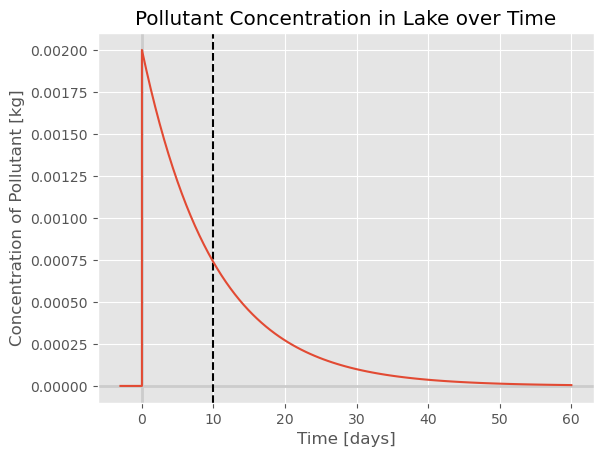

PyObject Text(0.5, 1.0, 'Pollutant Concentration in Lake over Time')

In [91]:
m = 20.0 #additional pollutant (units in kg) IMPULSE

k = 10.0 #time constant

Y = G_p*m + G_q #is in steady state #impulse equation
data = simulate(Y, 60.0)

viz_response(data)
axvline(k, color="black", label="Gₚ(s)", linestyle="--") 
xlabel("Time [days]")
ylabel("Concentration of Pollutant [kg]")
title("Pollutant Concentration in Lake over Time")

explain the "shape" of the response $c^*(t)$.

<mark>This is a steady-state concentration curve where the impulse of 20 kg of pollutants is added at t=0 and the concentration is seen to decay back to a steady state concentration of 0. </mark>

(2) now both $p^*(t)$ and $q^*(t)$ will change.
* the rate of snowmelt is decreasing, causing the flow rate of the outgoing river to diminish gradually, as $q^*(t)=-100t$ m$^3$/day.
* the night/day shift of the factory is causing the input pollution to vary sinusoidally as $p^*(t)=20 \sin(t)$ kg/day

again, simulate and plot the response $c^*(t)$ to these two combined inputs for $t \in [0, 60]$ days.

draw a three-panel plot with the two inputs on the first panel and the output on the last panel.

remember, if your data appears jagged instead of smooth, you can change `nb_time_points` (see [docs](https://simonensemble.github.io/Controlz.jl/dev/sim/#Controlz.simulate)).

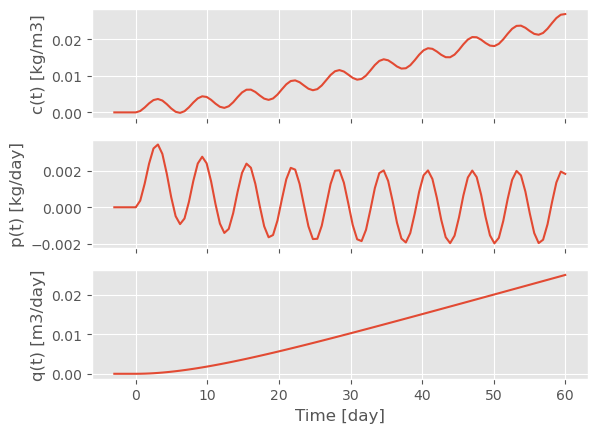

PyObject Text(0.5, 25.0, 'Time [day]')

In [105]:
#time_frame = [0.0, 60.0]
p_star = 20 * 1/((s^2) +1)
q_star = -100 / s^2

Y = (G_p * p_star) 
Z = (G_q * q_star)

C = Y + Z

data_C = simulate(C, 60.0, nb_time_points=100)
data_P = simulate(Y, 60.0, nb_time_points=100)
data_Q = simulate(Z, 60.0, nb_time_points=100)

t = data[:, :t]
fig, axs = subplots(3, 1, sharex=true) # two rows, one column

axs[1].plot(t, data_C[:, :output])
axs[1].set_ylabel("c*(t) [kg/m3]")
axs[2].plot(t, data_P[:, :output])
axs[2].set_ylabel("p(t) [kg/day]")
axs[3].plot(t, data_Q[:, :output])
axs[3].set_ylabel("q(t) [m3/day]")
axs[3].set_xlabel("Time [day]")

explain the shape of $c^*(t)$.

<mark>The shape of c*(t) is a linear combination of p(t) and q(t) where it can be seen that c*(t) is increasing but also displays oscillatory behavior. This is because sin(t) is a periodic function which gives rise to periodic oscillations but as the two transfer functions G_p and G_q are linear, due to the linearization of the two inputs, c*(t) is seen to increase in oscillatory fashion. </mark>